In [2]:
%reset -f

import pandas as pd
import pickle

import warnings
warnings.filterwarnings(action="ignore")

from exploration import *

from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [3]:
seed = 1
print("Seed value: ", seed)

Seed value:  1


#### Feature Engineering

In [4]:
global columns_to_categorize
columns_to_categorize = ["BuildingType", "PrimaryPropertyType", "Neighborhood"]
category_types = {column: 'object' for column in columns_to_categorize}

path = "./dataset/cleaned/"
filename = "TESTdata_exploration.csv"
dataset_path = "{}{}".format(path, filename)
# we assign the categorical features with a categotical type

dataset = pd.read_csv(dataset_path, encoding='utf-8', dtype=category_types)

In [5]:

target = "Log-TotalGHGEmissions"

# Elec, Gas, Gas+Steam, Gas+Steam+Other

dataset = dataset.drop(columns=["Log-TotalEnergy(kBtu)", "Log-NaturalGas(kBtu)", "Log-Electricity(kBtu)", "Log-SteamUse(kBtu)", "Ratio_Other", "Ratio_Steam", "Ratio_Steam+Gas+Other"])
display(dataset)

,Neighborhood,BuildingType,PrimaryPropertyType,ENERGYSTARScore,YearBuilt,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,Ratio_Electricity,Ratio_Gas,Ratio_Steam+Gas,Log-TotalGHGEmissions
0,Downtown,Nonresidential,Hotel,60.0,1927,2.564949,11.390023,11.390023,11.390023,0.000000,0.000000,0.546060,0.176638,0.453940,5.525373
1,Downtown,Nonresidential,Hotel,61.0,1996,2.484907,11.547974,11.390792,11.337154,9.620129,8.438799,0.386609,0.613391,0.613391,5.693261
2,Downtown,Nonresidential,Hotel,43.0,1969,3.737670,13.770629,13.540275,13.536450,0.000000,0.000000,0.682307,0.020579,0.317693,7.645053
3,Downtown,Nonresidential,Hotel,56.0,1926,2.397895,11.023878,11.023878,11.023878,0.000000,0.000000,0.407519,0.266567,0.592481,5.660979
4,Downtown,Nonresidential,Hotel,75.0,1980,2.944439,12.075856,11.640272,11.723559,11.127410,0.000000,0.378802,0.621198,0.621198,6.226556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,East,Multifamily mr (5-9),Mid-rise multifamily,84.0,2015,1.945910,11.362637,11.253351,11.269069,9.002947,7.222566,1.000000,0.000000,0.000000,2.776954
3143,Lake union,Nonresidential,Mixed use property,NaN,2015,1.945910,12.752143,12.469448,11.928499,11.575891,11.338608,0.600466,0.399534,0.399534,6.908815
3144,Southwest,Multifamily mr (5-9),Mid-rise multifamily,100.0,2015,2.079442,12.245952,11.913840,12.033040,10.708131,0.000000,0.559873,0.440127,0.440127,4.583947
3145,Central,Multifamily lr (1-4),Low-rise multifamily,99.0,2014,1.609438,9.915762,9.779454,9.779454,0.000000,0.000000,0.632940,0.367060,0.367060,2.989714


#### Method 1 CO2 : predict y des énergies X

In [6]:
dataset_CO2 = dataset.copy()
dataset_CO2 = dataset_CO2.drop("ENERGYSTARScore", axis=1)

In [7]:
dataset_CO2.columns.tolist()[:-1]

['Neighborhood',
 'BuildingType',
 'PrimaryPropertyType',
 'YearBuilt',
 'Log-NumberofFloors',
 'Log-PropertyGFATotal',
 'Log-PropertyGFABuilding(s)',
 'Log-LargestPropertyUseTypeGFA',
 'Log-SecondLargestPropertyUseTypeGFA',
 'Log-ThirdLargestPropertyUseTypeGFA',
 'Ratio_Electricity',
 'Ratio_Gas',
 'Ratio_Steam+Gas']

In [8]:
dataset_CO2

,Neighborhood,BuildingType,PrimaryPropertyType,YearBuilt,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,Ratio_Electricity,Ratio_Gas,Ratio_Steam+Gas,Log-TotalGHGEmissions
0,Downtown,Nonresidential,Hotel,1927,2.564949,11.390023,11.390023,11.390023,0.000000,0.000000,0.546060,0.176638,0.453940,5.525373
1,Downtown,Nonresidential,Hotel,1996,2.484907,11.547974,11.390792,11.337154,9.620129,8.438799,0.386609,0.613391,0.613391,5.693261
2,Downtown,Nonresidential,Hotel,1969,3.737670,13.770629,13.540275,13.536450,0.000000,0.000000,0.682307,0.020579,0.317693,7.645053
3,Downtown,Nonresidential,Hotel,1926,2.397895,11.023878,11.023878,11.023878,0.000000,0.000000,0.407519,0.266567,0.592481,5.660979
4,Downtown,Nonresidential,Hotel,1980,2.944439,12.075856,11.640272,11.723559,11.127410,0.000000,0.378802,0.621198,0.621198,6.226556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,East,Multifamily mr (5-9),Mid-rise multifamily,2015,1.945910,11.362637,11.253351,11.269069,9.002947,7.222566,1.000000,0.000000,0.000000,2.776954
3143,Lake union,Nonresidential,Mixed use property,2015,1.945910,12.752143,12.469448,11.928499,11.575891,11.338608,0.600466,0.399534,0.399534,6.908815
3144,Southwest,Multifamily mr (5-9),Mid-rise multifamily,2015,2.079442,12.245952,11.913840,12.033040,10.708131,0.000000,0.559873,0.440127,0.440127,4.583947
3145,Central,Multifamily lr (1-4),Low-rise multifamily,2014,1.609438,9.915762,9.779454,9.779454,0.000000,0.000000,0.632940,0.367060,0.367060,2.989714


In [9]:
# We create a training set and a test set (the test set contains 30% of the dataset)
train_common, test_common = train_test_split(dataset_CO2, test_size=0.3,  random_state=seed)

In [10]:
dataset_CO2.columns.tolist()[:-4]

['Neighborhood',
 'BuildingType',
 'PrimaryPropertyType',
 'YearBuilt',
 'Log-NumberofFloors',
 'Log-PropertyGFATotal',
 'Log-PropertyGFABuilding(s)',
 'Log-LargestPropertyUseTypeGFA',
 'Log-SecondLargestPropertyUseTypeGFA',
 'Log-ThirdLargestPropertyUseTypeGFA']

In [11]:
# liste des variables et étiquettes
model_CO2_target = dataset_CO2.columns.tolist()[10:]
model_CO2_features = dataset_CO2.columns.tolist()[:-4]
model_CO2 = model_CO2_features + model_CO2_target

In [12]:
model_CO2_features

['Neighborhood',
 'BuildingType',
 'PrimaryPropertyType',
 'YearBuilt',
 'Log-NumberofFloors',
 'Log-PropertyGFATotal',
 'Log-PropertyGFABuilding(s)',
 'Log-LargestPropertyUseTypeGFA',
 'Log-SecondLargestPropertyUseTypeGFA',
 'Log-ThirdLargestPropertyUseTypeGFA']

In [13]:
model_CO2_target

['Ratio_Electricity', 'Ratio_Gas', 'Ratio_Steam+Gas', 'Log-TotalGHGEmissions']

In [14]:
# Selection des variables pour modélisation CO2
train_CO2, test_CO2 = train_common[model_CO2], test_common[model_CO2]

In [15]:
dataset_CO2.select_dtypes(['category','object']) # we don't have 'object' here but it is just in case.

categorical_columns = dataset_CO2.select_dtypes(['category','object']).columns
numerical_columns = dataset_CO2[model_CO2_features].select_dtypes(include='number').columns.drop("YearBuilt") ###
#numerical_columns = X.select_dtypes(include='number').columns
print("We won't normalise the year so we drop it from numerical_columns.")

print("Shape of categorical variables : ", categorical_columns.shape)
print("Shape of numerical variables :", numerical_columns.shape)

We won't normalise the year so we drop it from numerical_columns.
Shape of categorical variables :  (3,)
Shape of numerical variables : (6,)


In [16]:
print("Numerical variables standardization")
print("We have :", numerical_columns.shape[0], "numerical features to standardize.",end="\n\n")

print(numerical_columns)

Numerical variables standardization
We have : 6 numerical features to standardize.

Index(['Log-NumberofFloors', 'Log-PropertyGFATotal',
       'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA',
       'Log-SecondLargestPropertyUseTypeGFA',
       'Log-ThirdLargestPropertyUseTypeGFA'],
      dtype='object')


In [17]:
# We train / fit the scaler on the training set / Computes the mean and std to be used for later scaling.
std_scaler_energy = StandardScaler().fit(train_CO2[numerical_columns])
# We transform the training set and the testing set / Performs standardization by centering and scaling.
train_CO2_std, test_CO2_std = train_CO2.copy(), test_CO2.copy()

train_CO2_std[numerical_columns] = std_scaler_energy.transform(train_CO2[numerical_columns])
test_CO2_std[numerical_columns] = std_scaler_energy.transform(test_CO2[numerical_columns])

print("Before")
display(train_CO2)
print("After")
display(train_CO2_std)

Before


,Neighborhood,BuildingType,PrimaryPropertyType,YearBuilt,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,Ratio_Electricity,Ratio_Gas,Ratio_Steam+Gas,Log-TotalGHGEmissions
1008,Northeast,Multifamily lr (1-4),Low-rise multifamily,1997,1.386294,10.727246,10.727246,10.122703,9.792444,7.848153,1.000000,0.000000,0.000000,2.299581
1784,North,Multifamily lr (1-4),Low-rise multifamily,1979,1.098612,10.429783,10.429783,10.429783,6.240276,0.000000,1.000000,0.000000,0.000000,2.005526
1563,Lake union,Multifamily lr (1-4),Low-rise multifamily,1988,1.609438,10.120533,10.120533,10.120533,0.000000,0.000000,0.999999,0.000000,0.000000,1.706565
452,Magnolia / queen anne,Nonresidential,Small- and mid-sized office,1982,1.791759,11.499526,11.499526,11.499526,0.000000,0.000000,1.000000,0.000000,0.000000,3.453474
1561,Downtown,Multifamily hr (10+),High-rise multifamily,1980,2.944439,11.738139,11.738139,11.634709,9.063811,0.000000,0.622160,0.377840,0.377840,4.777357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,East,Multifamily mr (5-9),Mid-rise multifamily,1985,1.791759,10.556620,10.556620,10.540540,0.000000,0.000000,1.000000,0.000000,0.000000,2.344686
905,Southwest,Nonresidential,Small- and mid-sized office,1981,1.386294,10.677938,10.677938,10.714440,0.000000,0.000000,0.875623,0.124377,0.124377,3.559625
1096,Northwest,Multifamily lr (1-4),Low-rise multifamily,1978,1.386294,11.397167,11.397167,11.213522,8.752423,0.000000,1.000000,0.000000,0.000000,3.080992
235,Downtown,Nonresidential,Small- and mid-sized office,1906,1.609438,11.059441,11.059441,10.946376,0.000000,0.000000,0.690156,0.309844,0.309844,4.328494


After


,Neighborhood,BuildingType,PrimaryPropertyType,YearBuilt,Log-NumberofFloors,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,Ratio_Electricity,Ratio_Gas,Ratio_Steam+Gas,Log-TotalGHGEmissions
1008,Northeast,Multifamily lr (1-4),Low-rise multifamily,1997,-0.287309,-0.238103,-0.185567,-0.759311,1.108652,1.972318,1.000000,0.000000,0.000000,2.299581
1784,North,Multifamily lr (1-4),Low-rise multifamily,1979,-0.782088,-0.582698,-0.543051,-0.397685,0.371487,-0.439239,1.000000,0.000000,0.000000,2.005526
1563,Lake union,Multifamily lr (1-4),Low-rise multifamily,1988,0.096471,-0.940947,-0.914700,-0.761868,-0.923528,-0.439239,0.999999,0.000000,0.000000,1.706565
452,Magnolia / queen anne,Nonresidential,Small- and mid-sized office,1982,0.410042,0.656541,0.742540,0.862077,-0.923528,-0.439239,1.000000,0.000000,0.000000,3.453474
1561,Downtown,Multifamily hr (10+),High-rise multifamily,1980,2.392512,0.932961,1.029299,1.021273,0.957442,-0.439239,0.622160,0.377840,0.377840,4.777357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,East,Multifamily mr (5-9),Mid-rise multifamily,1985,0.410042,-0.435764,-0.390622,-0.267254,-0.923528,-0.439239,1.000000,0.000000,0.000000,2.344686
905,Southwest,Nonresidential,Small- and mid-sized office,1981,-0.287309,-0.295223,-0.244824,-0.062464,-0.923528,-0.439239,0.875623,0.124377,0.124377,3.559625
1096,Northwest,Multifamily lr (1-4),Low-rise multifamily,1978,-0.287309,0.537964,0.619527,0.525270,0.892821,-0.439239,1.000000,0.000000,0.000000,3.080992
235,Downtown,Nonresidential,Small- and mid-sized office,1906,0.096471,0.146726,0.213656,0.210670,-0.923528,-0.439239,0.690156,0.309844,0.309844,4.328494


In [18]:
print("Categorical variables featuring")

print("We have :", categorical_columns.shape[0], "categorical features to encode.", end="\n\n")
print(categorical_columns)

Categorical variables featuring
We have : 3 categorical features to encode.

Index(['Neighborhood', 'BuildingType', 'PrimaryPropertyType'], dtype='object')


In [19]:
# 0) creating instance of one-hot-encoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) # if sparse=True (by default), we need to add .toarray() to encoded_categorical_data

# 1) Fit the encoder on the training set
one_hot_encoder.fit(train_CO2_std[categorical_columns])

# 2) we get the encoded numpy array
encoded_categorical_data = one_hot_encoder.transform(train_CO2_std[categorical_columns])

# 3) we make a list of the columns names
encoded_categorical_data_names = one_hot_encoder.get_feature_names_out().tolist()
print("We have indeed :", len(encoded_categorical_data_names), "labels after encoding the categorical variables.")

# 4) we recreate a dataframe with the column names and the numpy array
train_encoded = pd.DataFrame(columns=encoded_categorical_data_names,
                             data=encoded_categorical_data,
                             index=train_CO2_std.index)
display(train_encoded.sort_index())

We have indeed : 43 labels after encoding the categorical variables.


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Residence hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail store,PrimaryPropertyType_Self-storage facility,PrimaryPropertyType_Senior care community,PrimaryPropertyType_Small- and mid-sized office,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# 5) Concatenate the two dataframes for the training set

print("We need to add YearBuilt to the list of features.")
numerical_columns.tolist()
features_to_merge = numerical_columns.tolist().copy()
features_to_merge.append("YearBuilt")
features_to_merge.extend(model_CO2_target)
print(features_to_merge, end="\n\n")

# when merging, we put the categorical features first so that the targets will be at the end of the dataframe.
train_std_encoded = pd.merge(train_encoded.sort_index(), train_CO2_std[features_to_merge].sort_index(), left_index=True, right_index=True)
display(train_std_encoded.sort_index())

We need to add YearBuilt to the list of features.
['Log-NumberofFloors', 'Log-PropertyGFATotal', 'Log-PropertyGFABuilding(s)', 'Log-LargestPropertyUseTypeGFA', 'Log-SecondLargestPropertyUseTypeGFA', 'Log-ThirdLargestPropertyUseTypeGFA', 'YearBuilt', 'Ratio_Electricity', 'Ratio_Gas', 'Ratio_Steam+Gas', 'Log-TotalGHGEmissions']



,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Ratio_Electricity,Ratio_Gas,Ratio_Steam+Gas,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.529688,0.610942,0.733123,-0.923528,-0.439239,1927,0.546060,0.176638,0.453940,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.712666,0.611865,0.670863,1.072892,2.153810,1996,0.386609,0.613391,0.613391,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.287491,3.195060,3.260821,-0.923528,-0.439239,1969,0.682307,0.020579,0.317693,7.645053
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.640225,0.146566,0.738385,-0.923528,-0.439239,1999,0.609884,0.390116,0.390116,5.713106
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.703626,0.791386,0.909942,-0.923528,-0.439239,1926,0.577418,0.061159,0.422582,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.349445,-0.301074,-0.143318,0.841584,-0.439239,2015,0.631241,0.368758,0.368758,3.370051
3139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.913535,-0.915136,-0.752192,0.866893,2.071010,2015,0.399864,0.600136,0.600136,4.338858
3140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.151911,0.124058,0.478537,-0.923528,-0.439239,2015,0.643349,0.356651,0.356651,4.021057
3141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.037475,2.175125,2.265880,-0.923528,-0.439239,2015,0.535272,0.464728,0.464728,6.150390


In [21]:
# 5) One Hot Encoding on the testing set

# 5.1) we get the encoded numpy array
TEST_encoded_categorical_data = one_hot_encoder.transform(test_CO2_std[categorical_columns])

# 5.2) we recreate a dataframe with the column names and the numpy array
test_encoded = pd.DataFrame(columns=encoded_categorical_data_names,
                            data=TEST_encoded_categorical_data,
                            index=test_CO2_std.index)
display(test_encoded.sort_index())

# when merging, we put the categorical features first so that the targets will be at the end of the dataframe.
test_std_encoded = pd.merge(test_encoded.sort_index(), test_CO2_std[features_to_merge].sort_index(), left_index=True, right_index=True)
display(test_std_encoded.sort_index())

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,PrimaryPropertyType_Residence hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail store,PrimaryPropertyType_Self-storage facility,PrimaryPropertyType_Senior care community,PrimaryPropertyType_Small- and mid-sized office,PrimaryPropertyType_Supermarket / grocery store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship facility
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3142,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3143,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Ratio_Electricity,Ratio_Gas,Ratio_Steam+Gas,Log-TotalGHGEmissions
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.105529,0.170917,0.301939,-0.923528,-0.439239,1926,0.407519,0.266567,0.592481,5.660979
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.324188,0.911684,1.125905,1.385691,-0.439239,1980,0.378802,0.621198,0.621198,6.226556
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.456337,0.534847,0.634826,-0.923528,-0.439239,1926,0.488160,0.511840,0.511840,5.176940
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.165954,1.109334,1.221502,-0.923528,-0.439239,1969,0.386325,0.286692,0.613675,6.539962
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.173204,0.241123,0.370735,-0.923528,-0.439239,1928,0.203606,0.545281,0.796394,5.796757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.553162,1.339997,1.393305,1.527976,-0.439239,2015,0.472329,0.527671,0.527671,5.330397
3142,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.497963,0.446693,0.590684,0.944811,1.780089,2015,1.000000,0.000000,0.000000,2.776954
3143,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.107630,1.908167,1.367249,1.478762,3.044854,2015,0.600466,0.399534,0.399534,6.908815
3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.521235,1.240452,1.490359,1.298680,-0.439239,2015,0.559873,0.440127,0.440127,4.583947


In [22]:
train_CO2_preprocess = train_std_encoded.copy()
test_CO2_preprocess = test_std_encoded.copy()

In [23]:
train_CO2_preprocess

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-PropertyGFATotal,Log-PropertyGFABuilding(s),Log-LargestPropertyUseTypeGFA,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Ratio_Electricity,Ratio_Gas,Ratio_Steam+Gas,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.529688,0.610942,0.733123,-0.923528,-0.439239,1927,0.546060,0.176638,0.453940,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.712666,0.611865,0.670863,1.072892,2.153810,1996,0.386609,0.613391,0.613391,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.287491,3.195060,3.260821,-0.923528,-0.439239,1969,0.682307,0.020579,0.317693,7.645053
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.640225,0.146566,0.738385,-0.923528,-0.439239,1999,0.609884,0.390116,0.390116,5.713106
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.703626,0.791386,0.909942,-0.923528,-0.439239,1926,0.577418,0.061159,0.422582,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.349445,-0.301074,-0.143318,0.841584,-0.439239,2015,0.631241,0.368758,0.368758,3.370051
3139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.913535,-0.915136,-0.752192,0.866893,2.071010,2015,0.399864,0.600136,0.600136,4.338858
3140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.151911,0.124058,0.478537,-0.923528,-0.439239,2015,0.643349,0.356651,0.356651,4.021057
3141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.037475,2.175125,2.265880,-0.923528,-0.439239,2015,0.535272,0.464728,0.464728,6.150390


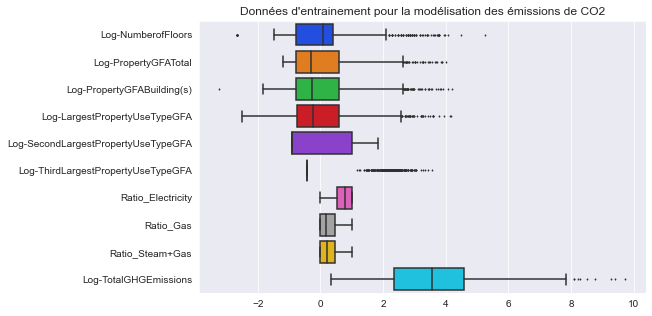

In [24]:
train_plot = train_CO2_preprocess.copy()
train_plot = train_plot.drop("YearBuilt", axis=1)
train_plot = train_plot.iloc[:, 43:]

# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(8,5))
plt.title('Données d\'entrainement pour la modélisation des émissions de CO2')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_plot), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

In [25]:
path = "./model/"

# Sauvegarde des jeux de données
train_CO2_preprocess.to_csv("{}{}".format(path, "test/ratio/train_ratio.csv"), encoding='utf-8', index=False)
test_CO2_preprocess.to_csv("{}{}".format(path, "test/ratio/test_ratio.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
#model = {'scaler': std_scaler_CO2, 'scaler_features': model_CO2_features}
#filename = 'model/test/CO2/scaler_CO2.sav'
#pickle.dump(model, open(filename, 'wb'))